In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_csv("bestsellers with categories.csv")

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
#checking for the number of unique observations
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [7]:
#check the sahpe of the dataset
df.shape

(550, 7)

In [9]:
#check for the null values in the dataset
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

there is no missing data in the dataset

In [10]:
#check for any duplicates
df.duplicated().sum()

0

There is no duplicate data

In [12]:
df['Name'].value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Official SAT Study Guide                                                          5
To Kill a Mockingbird                                                                 5
The 5 Love Languages: The Secret to Love That Lasts                                   5
Name: Name, dtype: int64

In [15]:
## Creating a plot showing the top 10 authors by rating.

#group the dataset by author with mean values of the numerical columns
author = df.groupby(['Author']).mean()

#sort descendingly by user rating
author = author.sort_values('User Rating', ascending=False)

#fetch top 10 authors with top ratings
top_author = author.head(10)

top_author[['User Rating']]

,User Rating
Author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
Pete Souza,4.9
Sarah Young,4.9
Bill Martin Jr.,4.9
Dav Pilkey,4.9


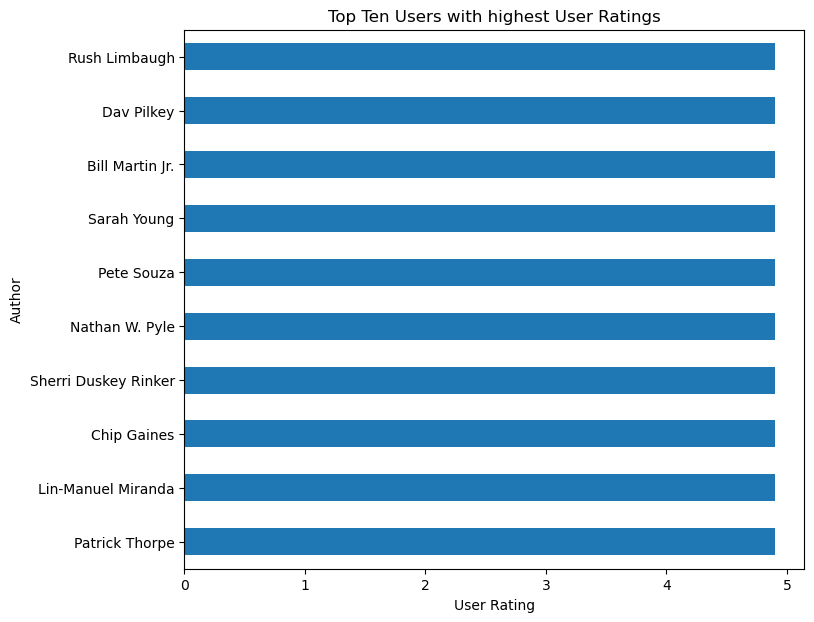

In [17]:
plt.figure(figsize=(8,7))

top_author['User Rating'].plot(kind='barh')
plt.title('Top Ten Users with highest User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Author')
plt.show()

In [19]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

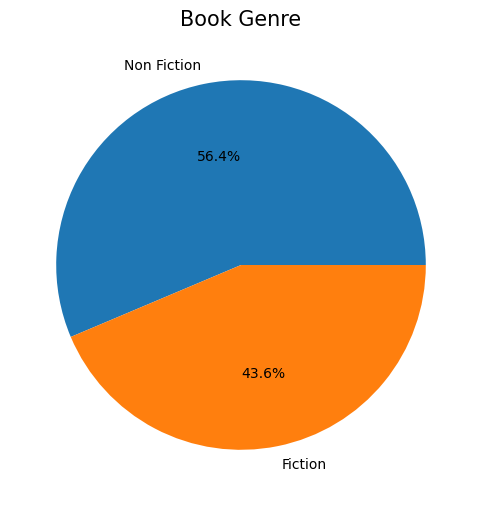

In [23]:
## Creating a pie chart showing the distribution of book genre.
plt.figure(figsize=(8,6))

plt.pie(x=df['Genre'].value_counts(),
        labels= df['Genre'].value_counts().index, 
       autopct = '%1.1f%%')

plt.title('Book Genre', {'fontsize': 15})
plt.show()

310 books belong to non fiction genre constituting to 56.4% of the total dataset while 240 books belongs to the Fiction genre making just 43.6% of the entire dataset. Therefore, there are more books in the Non fiction genre than in the Fiction genre

In [25]:
#group the dataset by name with sum values of the numerical columns
top_book = df.groupby(['Name']).sum()

#sort descendingly by reviews
top_book = top_book.sort_values('Reviews', ascending=False)

#fetch top 5 authors with top ratings
top_book = top_book.head(5)

top_book[['Reviews']]

,Reviews
Name,
The Fault in Our Stars,201928
"Oh, the Places You'll Go!",174672
Gone Girl,171813
The Girl on the Train,158892
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",148365


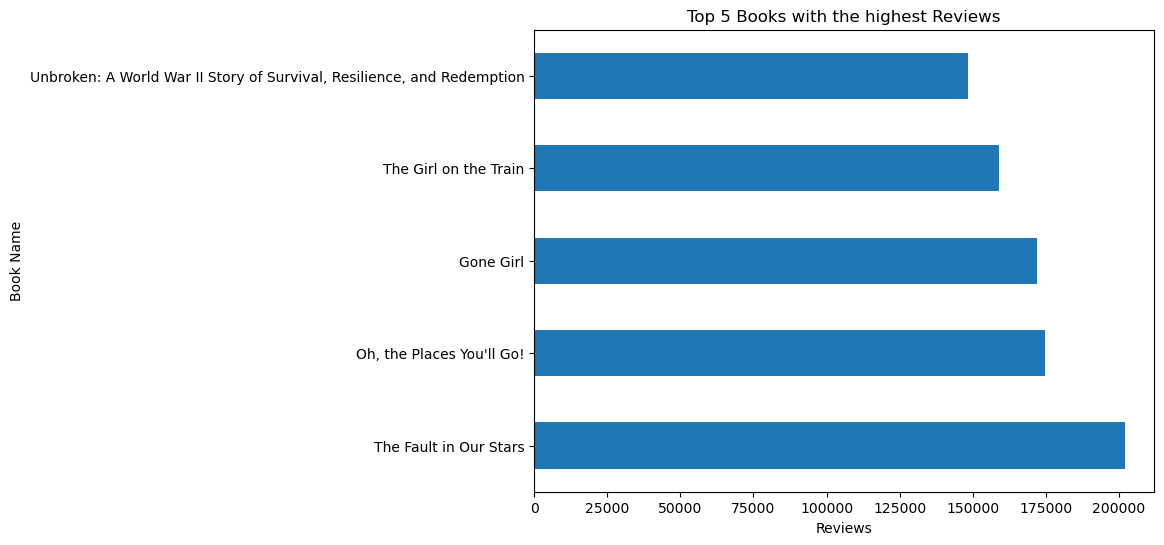

In [27]:
plt.figure(figsize=(8,6))

top_book['Reviews'].plot(kind='barh')
plt.title('Top 5 Books with the highest Reviews')
plt.xlabel('Reviews')
plt.ylabel('Book Name')
plt.show()

The book titled 'The Fault in Our Stars' has the highest review with 201,928 total reviews followed by 'Oh, the Places You'll Go!' (174,672 reviews), 'Gone Girl' (171,813 reviews), 'The Girl on the Train' (158,892 reviews) and least on the list is 'Unbroken' (148365 reviews)

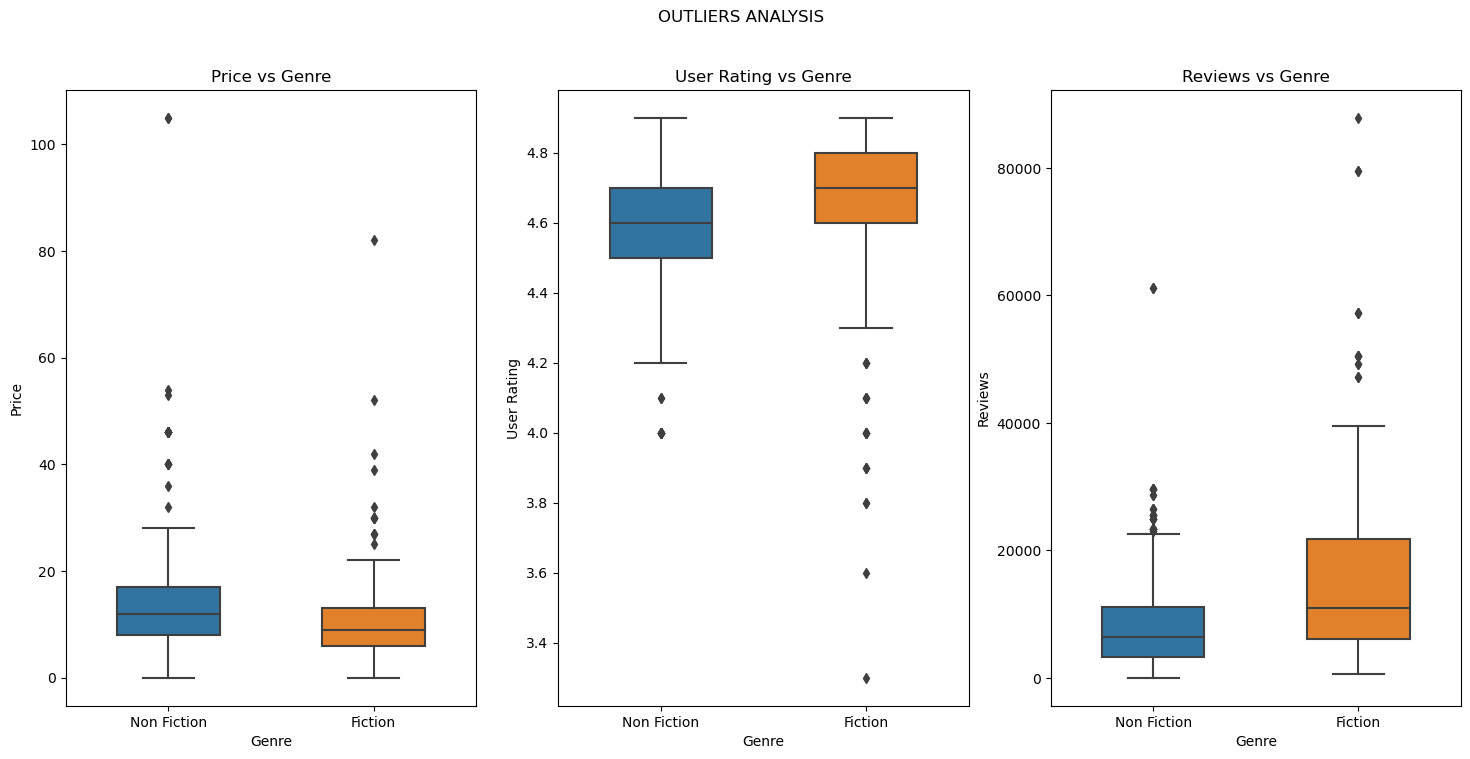

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharex=True)

#title for the three charts
fig.suptitle('OUTLIERS ANALYSIS')

#create the first plot and title
sns.boxplot(ax=axes[0], data=df, x='Genre', y='Price', width=0.5)
axes[0].set_title('Price vs Genre')

#create the second plot and title
sns.boxplot(ax=axes[1], data=df, x='Genre', y='User Rating', width=0.5)
axes[1].set_title('User Rating vs Genre')

#create the third plot and title
sns.boxplot(ax=axes[2], data=df, x='Genre', y='Reviews', width=0.5)
axes[2].set_title('Reviews vs Genre');

there are outliers in the dataset. The above chart shows the distributions of price, user rating and reviews based on the Book Genre using a box plot. The average Price of the books below 20, average user rating is around 4.6 and average revie is below 10,000. Any huge spike below or above these averages can be conisdered outliers

In [29]:
## The average price of Books sold each year categorized by their Genres

In [31]:
#group the dataset by year and genre with mean estimation
avg_yr_price = df.groupby(['Year','Genre']).mean()
avg_yr_price[['Price']]

Price
Year Genre                 
2009 Fiction      15.583333
     Non Fiction  15.230769
2010 Fiction       9.700000
     Non Fiction  16.000000
2011 Fiction      11.619048
     Non Fiction  17.620690
2012 Fiction      12.285714
     Non Fiction  17.482759
2013 Fiction      10.708333
     Non Fiction  18.192308
2014 Fiction      10.172414
     Non Fiction  20.809524
2015 Fiction       9.352941
     Non Fiction  10.969697
2016 Fiction      12.631579
     Non Fiction  13.516129
2017 Fiction       8.833333
     Non Fiction  13.730769
2018 Fiction       8.761905
     Non Fiction  11.793103
2019 Fiction       9.350000
     Non Fiction  10.566667

Text(0, 0.5, 'Price')

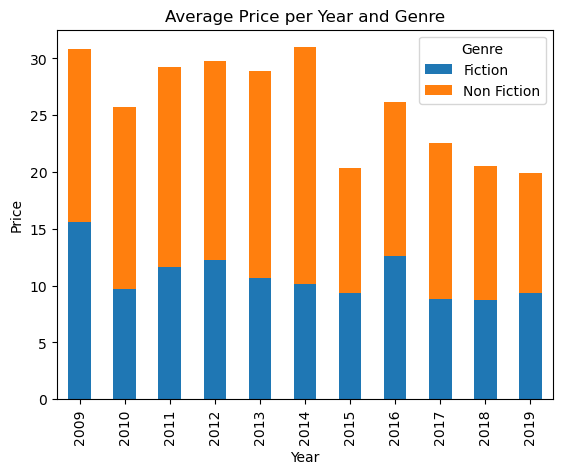

In [33]:
#create a stacked barplot and customuize
avg_yr_price.unstack().plot(kind='bar',y='Price', stacked=True)
plt.title('Average Price per Year and Genre')
plt.xlabel('Year')
plt.ylabel('Price')

The average prices spent on books drops by year especially for the Fictional books

In [34]:
## The average review of books per year categorized by their Genres

In [36]:
review_metrics = df.groupby(['Year', 'Genre']).mean()
review_metrics = review_metrics[['Reviews']]
review_metrics

Reviews
Year Genre                    
2009 Fiction       6534.333333
     Non Fiction   3026.230769
2010 Fiction       8409.250000
     Non Fiction   3526.533333
2011 Fiction      10335.285714
     Non Fiction   6482.758621
2012 Fiction      19896.238095
     Non Fiction   8162.931034
2013 Fiction      19986.833333
     Non Fiction   6739.346154
2014 Fiction      19382.862069
     Non Fiction  10994.952381
2015 Fiction      23706.117647
     Non Fiction   9353.484848
2016 Fiction      19563.263158
     Non Fiction  10906.387097
2017 Fiction      14611.833333
     Non Fiction  11297.538462
2018 Fiction      12710.428571
     Non Fiction  14813.862069
2019 Fiction      18507.150000
     Non Fiction  14159.133333

<Figure size 1000x600 with 0 Axes>

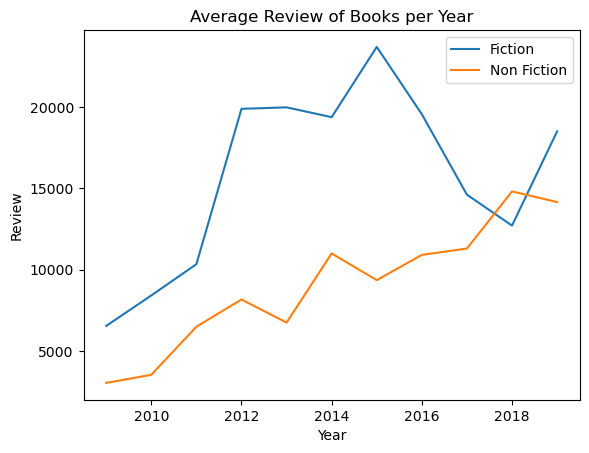

In [37]:
plt.figure(figsize=(10,6))

review_metrics.unstack().plot()
plt.title('Average Review of Books per Year')
plt.ylabel('Review')
plt.legend(['Fiction', 'Non Fiction'], loc='upper right')

The plot above shows the trend of the average reviews made each year. The non fictional books get increasing reviews by year until 2015 when there was a fall and picked up in 2018. For non fictional books, there has been an increasing trend on the average reviews made by year.

In [38]:
## correlation between the numerical columns

In [41]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


Text(0.5, 1.0, 'Correlation Visualization')

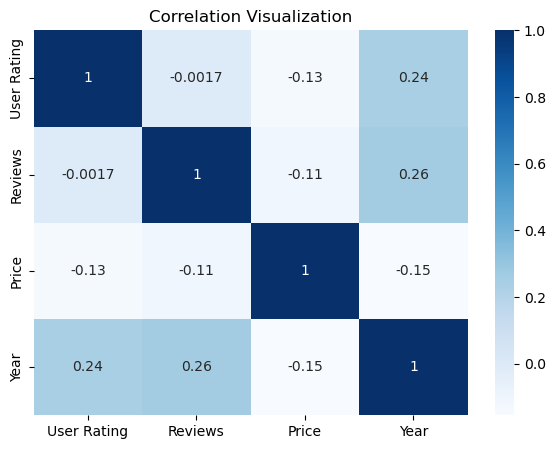

In [43]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Visualization')

In [47]:
# Find 25%,50% & 75% quartile value in Reviews.
quartiles = df['Reviews'].quantile([0.25,0.5,0.75])
print("25% Quartile: ",quartiles[0.25]) 
print("50% Quartile: ",quartiles[0.5])
print("75% Quartile: ",quartiles[0.75])

25% Quartile:  4058.0
50% Quartile:  8580.0
75% Quartile:  17253.25


In [48]:
# Find 25%,50% & 75% quartile value User Ratngs.
quartiles = df['User Rating'].quantile([0.25,0.5,0.75])
print("25% Quartile: ",quartiles[0.25])
print("50% Quartile: ",quartiles[0.5])
print("75% Quartile: ",quartiles[0.75])

25% Quartile:  4.5
50% Quartile:  4.7
75% Quartile:  4.8


In [49]:
# Find 25%,50% & 75% quartile value Price.
quartiles = df['Price'].quantile([0.25,0.5,0.75])
print("25% Quartile: ",quartiles[0.25])
print("50% Quartile: ",quartiles[0.5])
print("75% Quartile: ",quartiles[0.75])

25% Quartile:  7.0
50% Quartile:  11.0
75% Quartile:  16.0


In [50]:
# Find maxiumam value in Reviews.
Maximum_value = df['Reviews'].max()
Maximum_value

87841

In [51]:
# Find maxiumam value in Price.
Maximum_value = df['Price'].max()
Maximum_value

105

In [54]:
# Find mean value in Reviews.
Mean_value = df['Reviews'].mean()
Mean_value

11953.281818181818

In [53]:
# Find mean value in Price.
Mean_value = df['Price'].mean()
Mean_value

13.1